In [78]:
import pandas as pd

In [79]:
df = pd.read_csv('excelview.csv')
df.head()

,Unnamed: 0,Address,Beds_Min,Beds_Max,Baths_Min,Baths_Max,Sqft_Min,Sqft_Max,Lat,Lon,Distance,Rent,Rent_max,Neighborhood
0,0,1325 Garfield St,0,2,1.0,1.5,400.0,960.0,39.737231,-104.944294,3373.787845,1135,1545,Capital Avenue
1,1,818-848 S Dexter St,1,2,1.0,2.0,580.0,985.0,39.701790,-104.932290,3375.678963,1130,1465,Washington Virginia Vale
2,2,1300 Adams St,1,2,1.0,1.0,550.0,750.0,39.736992,-104.948081,3373.478254,1750,1750,Capital Avenue
3,3,9649 E 5th Ave,1,3,1.0,2.0,789.0,1378.0,39.724870,-104.876410,3379.755239,1354,2328,Lowry Field
4,4,1380 Steele St,0,2,1.0,2.0,500.0,925.0,39.738056,-104.949162,3373.361499,1350,2100,Capital Avenue


In [80]:
df2 = pd.get_dummies(df)
df2.head()

,Unnamed: 0,Beds_Min,Beds_Max,Baths_Min,Baths_Max,Sqft_Min,Sqft_Max,Lat,Lon,Distance,...,Neighborhood_Park Mayfair Condominiums,Neighborhood_Polo Club North,Neighborhood_Shangri La Heights,Neighborhood_Stapleton,Neighborhood_Stapleton Mansion Homes Condominiums,Neighborhood_The French Quarter Condominiums,Neighborhood_The Pinnacle at City Park South,Neighborhood_Walnut Hill,Neighborhood_Washington Park,Neighborhood_Washington Virginia Vale
0,0,0,2,1.0,1.5,400.0,960.0,39.737231,-104.944294,3373.787845,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,1.0,2.0,580.0,985.0,39.701790,-104.932290,3375.678963,...,0,0,0,0,0,0,0,0,0,1
2,2,1,2,1.0,1.0,550.0,750.0,39.736992,-104.948081,3373.478254,...,0,0,0,0,0,0,0,0,0,0
3,3,1,3,1.0,2.0,789.0,1378.0,39.724870,-104.876410,3379.755239,...,0,0,0,0,0,0,0,0,0,0
4,4,0,2,1.0,2.0,500.0,925.0,39.738056,-104.949162,3373.361499,...,0,0,0,0,0,0,0,0,0,0


In [81]:
foam = df[["Rent","Beds_Min","Beds_Min","Baths_Min","Sqft_Min","Sqft_Max"]]
foam = foam.dropna()
foam.head()

,Rent,Beds_Min,Beds_Min,Baths_Min,Sqft_Min,Sqft_Max
0,1135,0,0,1.0,400.0,960.0
1,1130,1,1,1.0,580.0,985.0
2,1750,1,1,1.0,550.0,750.0
3,1354,1,1,1.0,789.0,1378.0
4,1350,0,0,1.0,500.0,925.0


In [82]:
X = foam[["Beds_Min","Beds_Min","Baths_Min","Sqft_Min","Sqft_Max"]]
y = foam["Rent"].values.reshape(-1, 1)
print(X.shape, y.shape)

(94, 7) (94, 1)


In [83]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [84]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [85]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8421160267023243
Testing Score: 0.3043026227025384


Text(0.5, 1.0, 'Residual Plot')

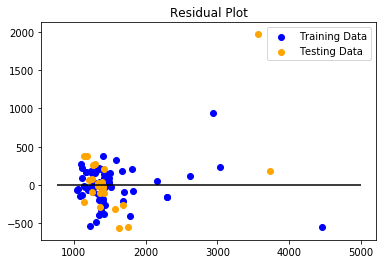

In [86]:
# Plot the Residuals for the Training and Testing data
import matplotlib.pyplot as plt
### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION